In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [15]:
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<b>we remouve the outliers using the function zscore</b>

In [16]:
z_scores = zscore(df[["price","sqft_living","bathrooms","grade","sqft_above","yr_built","sqft_living15"]])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

print(z_scores)
print(abs_z_scores)
print(filtered_entries)
new_df

[[-0.86671733 -0.97983502 -1.44746357 ... -0.73470764 -0.54489777
  -0.9433552 ]
 [-0.00568792  0.53363434  0.1756067  ...  0.46084084 -0.6810785
  -0.43268619]
 [-0.98084935 -1.42625404 -1.44746357 ... -1.22983377 -1.29389179
   1.07013975]
 ...
 [-0.37586519 -1.15404732 -1.77207762 ... -0.92792759  1.29354209
  -1.41025258]
 [-0.38158814 -0.52252773  0.50022075 ... -0.22750526  1.12331618
  -0.8412214 ]
 [-0.58588173 -1.15404732 -1.77207762 ... -0.92792759  1.25949691
  -1.41025258]]
[[0.86671733 0.97983502 1.44746357 ... 0.73470764 0.54489777 0.9433552 ]
 [0.00568792 0.53363434 0.1756067  ... 0.46084084 0.6810785  0.43268619]
 [0.98084935 1.42625404 1.44746357 ... 1.22983377 1.29389179 1.07013975]
 ...
 [0.37586519 1.15404732 1.77207762 ... 0.92792759 1.29354209 1.41025258]
 [0.38158814 0.52252773 0.50022075 ... 0.22750526 1.12331618 0.8412214 ]
 [0.58588173 1.15404732 1.77207762 ... 0.92792759 1.25949691 1.41025258]]
[ True  True  True ...  True  True  True]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<ipython-input-17-f21172866ebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["yr_built"]=pd.qcut(new_df["yr_built"],4,precision=0,labels=["very_old", "old", "recent","pretty_recent"])


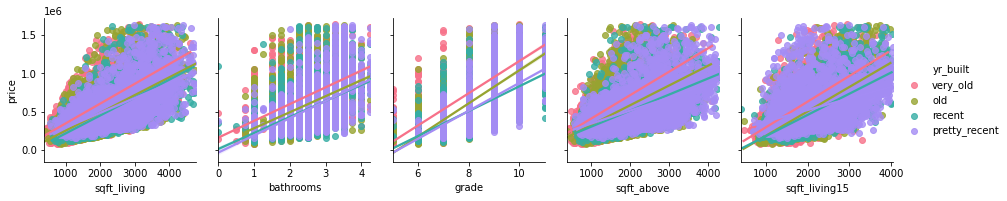

In [17]:
new_df["yr_built"]=pd.qcut(new_df["yr_built"],4,precision=0,labels=["very_old", "old", "recent","pretty_recent"])

sns.pairplot(new_df,hue="yr_built",x_vars=["sqft_living","bathrooms","grade","sqft_above","sqft_living15"],y_vars="price",palette="husl",kind="reg")

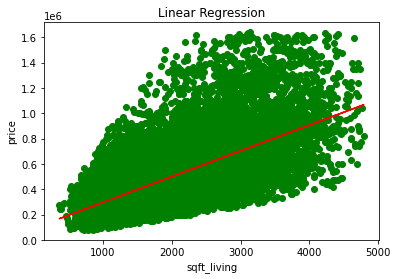

MSE for Linear regression:  37152028225.80709
R squared for Linear regression:  0.3998585330226001 



In [19]:
x_lin=new_df["sqft_living"].values.reshape(-1, 1)
y=new_df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x_lin, y, test_size=0.3, random_state=3)
model_lin=LinearRegression()
model_lin.fit(x_train, y_train)
predicted= model_lin.predict(x_test)

plt.plot(x_lin,model_lin.predict(x_lin),color="red")
plt.scatter(x_lin,y,color="green")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.show()

print("MSE for Linear regression: ", metrics.mean_squared_error(y_test, predicted))
print("R squared for Linear regression: ", metrics.r2_score(y_test,predicted),"\n")

In [20]:
x_multi_lin=new_df[["sqft_living","grade","sqft_above","sqft_living15"]]

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi_lin, y, test_size=0.3, random_state=3)

model_multi_lin=LinearRegression()
model_multi_lin.fit(x_train_multi, y_train_multi)

predicted_multi= model_multi_lin.predict(x_test_multi)

print("MSE for Multi linear regression: ", metrics.mean_squared_error(y_test_multi, predicted_multi))
print("R squared for Multi linear regression: ", metrics.r2_score(y_test_multi,predicted_multi),"\n")

# print("coef = ", model_multi_lin.coef_ ,"\n")
# print("intercept = ", model_multi_lin.intercept_)

MSE for Multi linear regression:  31179515835.935352
R squared for Multi linear regression:  0.49633650524562145 



In [22]:
poly=PolynomialFeatures(degree=2)

x_train_poly=poly.fit_transform(x_train_multi)
model_multi_lin.fit(x_train_poly, y_train_multi)
x_test_poly=poly.fit_transform(x_test_multi)
predicted_poly= model_multi_lin.predict(x_test_poly)

print("MSE for poly regression: ", metrics.mean_squared_error(y_test_multi, predicted_poly))
print("R squared for poly regression: ", metrics.r2_score(y_test_multi,predicted_poly),"\n")

# print("coef = ", model_multi_lin.coef_ ,"\n")
# print("intercept = ", model_multi_lin.intercept_)

MSE for poly regression:  29287129629.031742
R squared for poly regression:  0.5269054805757499 

